<a href="https://colab.research.google.com/github/jonhmaia/IA-e-Analise-de-Dados/blob/main/anemiadiagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **IMPPORTA TODAS A BIBLIOTECAS NECESSÁRIAS PARA IMPLEMENTAR O K-MEANS E A REGRESSÃO LOGÍSTICA**

In [410]:
import os
import pandas as pd
import os, sys
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
import warnings


data = pd.read_csv("anemia.csv")
print(data)


      Gender  Hemoglobin   MCH  MCHC   MCV  Result
0          1        14.9  22.7  29.1  83.7       0
1          0        15.9  25.4  28.3  72.0       0
2          0         9.0  21.5  29.6  71.2       1
3          0        14.9  16.0  31.4  87.5       0
4          1        14.7  22.0  28.2  99.5       0
...      ...         ...   ...   ...   ...     ...
1416       0        10.6  25.4  28.2  82.9       1
1417       1        12.1  28.3  30.4  86.9       1
1418       1        13.1  17.7  28.1  80.7       1
1419       0        14.3  16.2  29.5  95.2       0
1420       0        11.8  21.2  28.4  98.1       1

[1421 rows x 6 columns]



#### ** MOSTRA O DATA SET E FAZ A VERIFICAÇÃO SE HÁ VALORES DUPLICADOS OU NULOS A FIM DE LIMPAR O DATA SET**


In [389]:
counts = data['Result'].value_counts()
data.info()
data.count()
print(counts)
print("Há {} valores duplicados no dataset".format(data.duplicated().sum()))
print("Colunas de dados com valor nulo: \n{}".format(data.isnull().sum()))
#1336 pra treino e 85 para testes
# 620 positivos 
# 801 negativos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB
0    801
1    620
Name: Result, dtype: int64
Há 887 valores duplicados no dataset
Colunas de dados com valor nulo: 
Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64


#### **LIMPA AS COLUNAS DUPLICADAS E COM VALOR NULO**

In [390]:
duplicated = data[data.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['Gender', "Hemoglobin", "MCH",'MCHC','MCV',"Result"], ascending= False) 
duplicated.head()
data.drop_duplicates(inplace=True)
print("Há {} valores duplicados no dataset".format(data.duplicated().sum()))
print("Colunas de dados com valor nulo: \n{}".format(data.isnull().sum()))

Há 0 valores duplicados no dataset
Colunas de dados com valor nulo: 
Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64


In [391]:
x = data.copy(deep=True)
print(x.describe())

           Gender  Hemoglobin         MCH        MCHC         MCV      Result
count  534.000000  534.000000  534.000000  534.000000  534.000000  534.000000
mean     0.522472   13.287079   22.911985   30.249438   85.647004    0.462547
std      0.499963    2.066276    3.948482    1.412312    9.604934    0.499063
min      0.000000    6.600000   16.000000   27.800000   69.400000    0.000000
25%      0.000000   11.600000   19.500000   29.000000   77.325000    0.000000
50%      1.000000   13.100000   22.750000   30.400000   85.450000    0.000000
75%      1.000000   14.975000   26.100000   31.475000   94.150000    1.000000
max      1.000000   16.900000   30.000000   32.500000  101.600000    1.000000


#### **UNIFORMIZA OS DADOS**

In [392]:
s_list = ["Gender", "Hemoglobin", "MCH", "MCHC", "MCV"]
res = "Result"

def standartization(x):
    x_std = x.copy(deep=True)
    for column in s_list:
        x_std[column] = (x_std[column]-x_std[column].mean())/x_std[column].std()
    return x_std 
x_std=standartization(x)
print(x_std.head())

     Gender  Hemoglobin       MCH      MCHC       MCV  Result
0  0.955127    0.780594 -0.053688 -0.813870 -0.202709       0
1 -1.045021    1.264556  0.630119 -1.380317 -1.420833       0
2 -1.045021   -2.074785 -0.357602 -0.459841 -1.504123       1
3 -1.045021    0.780594 -1.750542  0.814666  0.192921       0
4  0.955127    0.683801 -0.230971 -1.451123  1.442279       0


#### **SEPARA O TREINO E TESTE, SEPARANDO 20% DOS DADOS PARA TREINO E 80% PARA TREINO**

In [393]:
y = x["Result"]
y.shape
x.drop("Result", axis=1,inplace=True)
x.head()
xtrain,xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42)



#### **APLICA A TÉCNICA DA REGRESSÂO LOGÍSTICA**



In [412]:
logistic = LogisticRegression()
logistic.fit(xtrain, ytrain)
prediction=logistic.predict(xtest)
a=logistic.decision_function(xtest)
accuracy_scorelr = accuracy_score(ytest, prediction)


#### **IMPORTA O K-MEANS E DEFINE O NÚMERO CLUSTERS QUE NO NOSSO CASO É 2**

In [414]:
from sklearn.cluster import KMeans

# Gerar clusters pelo kmeans
km = KMeans(n_clusters=2, random_state=0).fit(xtrain)

In [415]:
real_c_y = []
for idx, c in enumerate(km.cluster_centers_):
  dist = np.linalg.norm(xtrain - c, axis=1)
  real_c_y.append((idx, ytrain.iloc[np.where(dist == dist.min())[0][0]]))

  del dist

print(real_c_y)

[(0, 1), (1, 0)]


In [397]:
result = km.predict(xtest)
result_copy = result.copy()

In [398]:
# Substituir os clusters formados pelo kmeans pelas classes reais
for c in range(len(real_c_y),):
  result[np.where(result_copy == c)[0]] = real_c_y[c][1]

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Test accuracy:  0.9906542056074766


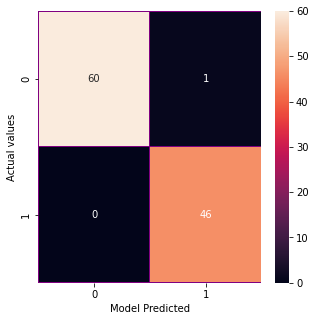

In [418]:
from sklearn.metrics import confusion_matrix as conf_matrix

# Exibe a matriz de confusão
conf_matrix(ytest, result)
# Matriz de confusão
logreg_best = LogisticRegression(C=74, penalty="l1", solver="liblinear")
logreg_best.fit(xtrain, ytrain)
print("Test accuracy: ",logreg_best.score(xtest, ytest))

y_true = ytest
y_pred = logreg_best.predict(xtest)

cm = confusion_matrix(y_true, y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,fmt=".0f", annot=True,linewidths=0.2, linecolor="purple", ax=ax)
plt.xlabel("modelo previsto")
plt.ylabel("Valores reais")
plt.show()

In [409]:
# Mostra acurácia total da classificação
correct_values = np.where(ytest == result)[0]
print("Regressão linear: %.2f" % (100*(correct_values.shape[0] / result.shape[0])) + " %")
print("Regressão logística:%.2f " % (accuracy_scorelr*100)+ "%" )

del correct_values

K-MEANS: 46.73 %
Regressão logística:98.13 %
